# Example 9-1:  RNN - Toy Example


In [1]:
from keras.models import Sequential, load_model
from keras import layers
from keras import backend as K
from keras import optimizers

from keras.utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Using TensorFlow backend.


## Data generation

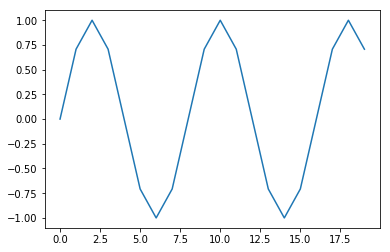

In [2]:
from scipy.linalg import toeplitz
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s)

## Construct training instances

In [3]:
SEQ_LEN = 3
DATA_DIM = 1

# build a dataset
X_train = []
y_train = []

In [4]:
for i in range(0, len(s) - SEQ_LEN):
    _x = s[i:i + SEQ_LEN, np.newaxis]
    _y = s[i + SEQ_LEN]  
    X_train.append(_x)
    y_train.append(_y)

- input: 3개의 연속된 시점, 1차원 데이터. input_shape=(3,1)
- output: 그 다음 1시점 1차원 데이터

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
X_train.shape

(17, 3, 1)

- keras의 input으로 사용하기 위해 np array로 변환

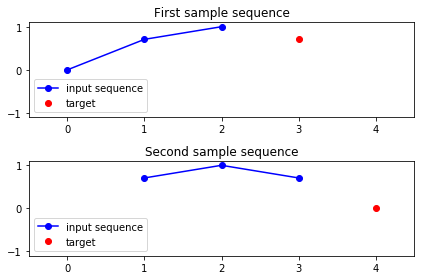

In [7]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

## Model building

### (1) Model with a single RNN layer

In [8]:
model = Sequential()
model.add(layers.SimpleRNN(10, input_shape=(3,1), return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [9]:
# Visualize/check the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


### (2) Model with multiple RNN layers

In [10]:
model = Sequential()
model.add(layers.SimpleRNN(10, input_shape = (3,1), return_sequences = True))
model.add(layers.SimpleRNN(10, input_shape = (3,1), return_sequences = False))
model.add(layers.Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])


## Model fitting 

In [11]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1)

Train on 13 samples, validate on 4 samples
Epoch 1/100
13/13 [==============================] - 1s 98ms/step - loss: 0.2274 - mean_absolute_error: 0.4361 - val_loss: 0.2119 - val_mean_absolute_error: 0.4180
Epoch 2/100
13/13 [==============================] - 0s 761us/step - loss: 0.2028 - mean_absolute_error: 0.4106 - val_loss: 0.1880 - val_mean_absolute_error: 0.3928
Epoch 3/100
13/13 [==============================] - 0s 745us/step - loss: 0.1766 - mean_absolute_error: 0.3813 - val_loss: 0.1645 - val_mean_absolute_error: 0.3662
Epoch 4/100
13/13 [==============================] - 0s 615us/step - loss: 0.1512 - mean_absolute_error: 0.3505 - val_loss: 0.1420 - val_mean_absolute_error: 0.3390
Epoch 5/100
13/13 [==============================] - 0s 544us/step - loss: 0.1277 - mean_absolute_error: 0.3189 - val_loss: 0.1210 - val_mean_absolute_error: 0.3116
Epoch 6/100
13/13 [==============================] - 0s 551us/step - loss: 0.1065 - mean_absolute_error: 0.2891 - val_loss: 0.1018 - 

Epoch 51/100
13/13 [==============================] - 0s 526us/step - loss: 7.6032e-04 - mean_absolute_error: 0.0184 - val_loss: 6.9002e-04 - val_mean_absolute_error: 0.0191
Epoch 52/100
13/13 [==============================] - 0s 644us/step - loss: 7.3936e-04 - mean_absolute_error: 0.0190 - val_loss: 6.7696e-04 - val_mean_absolute_error: 0.0194
Epoch 53/100
13/13 [==============================] - 0s 537us/step - loss: 7.3067e-04 - mean_absolute_error: 0.0203 - val_loss: 6.7549e-04 - val_mean_absolute_error: 0.0198
Epoch 54/100
13/13 [==============================] - 0s 610us/step - loss: 7.2761e-04 - mean_absolute_error: 0.0214 - val_loss: 6.8406e-04 - val_mean_absolute_error: 0.0202
Epoch 55/100
13/13 [==============================] - 0s 510us/step - loss: 7.2542e-04 - mean_absolute_error: 0.0223 - val_loss: 7.0083e-04 - val_mean_absolute_error: 0.0207
Epoch 56/100
13/13 [==============================] - 0s 561us/step - loss: 7.2127e-04 - mean_absolute_error: 0.0230 - val_loss: 7

Epoch 99/100
13/13 [==============================] - 0s 597us/step - loss: 3.0661e-04 - mean_absolute_error: 0.0141 - val_loss: 3.7867e-04 - val_mean_absolute_error: 0.0165
Epoch 100/100
13/13 [==============================] - 0s 582us/step - loss: 3.0192e-04 - mean_absolute_error: 0.0140 - val_loss: 3.7377e-04 - val_mean_absolute_error: 0.0165


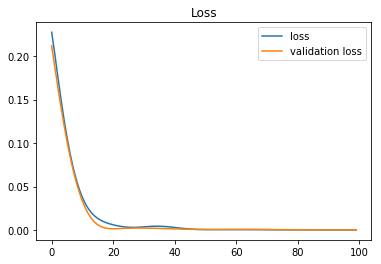

In [12]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

## Prediction

In [13]:
y_pred = model.predict(X_train[:,:,:])

In [14]:
y_pred

array([[ 0.7120254 ],
       [-0.02195242],
       [-0.6819109 ],
       [-1.0074722 ],
       [-0.70688266],
       [ 0.02205796],
       [ 0.67706305],
       [ 1.0090386 ],
       [ 0.7120254 ],
       [-0.02195242],
       [-0.6819109 ],
       [-1.0074722 ],
       [-0.70688266],
       [ 0.02205796],
       [ 0.67706305],
       [ 1.0090386 ],
       [ 0.7120254 ]], dtype=float32)

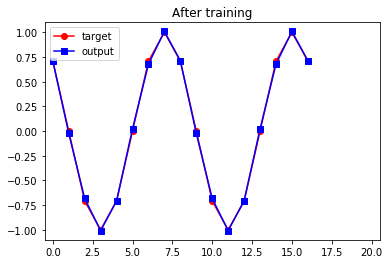

In [15]:
plt.plot(y_train, 'ro-', label="target")
plt.plot(y_pred, 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()